In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard

from datetime import datetime

In [2]:
## Data preparation 
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()


# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)


n_features = X.shape[1]
n_classes = Y.shape[1]

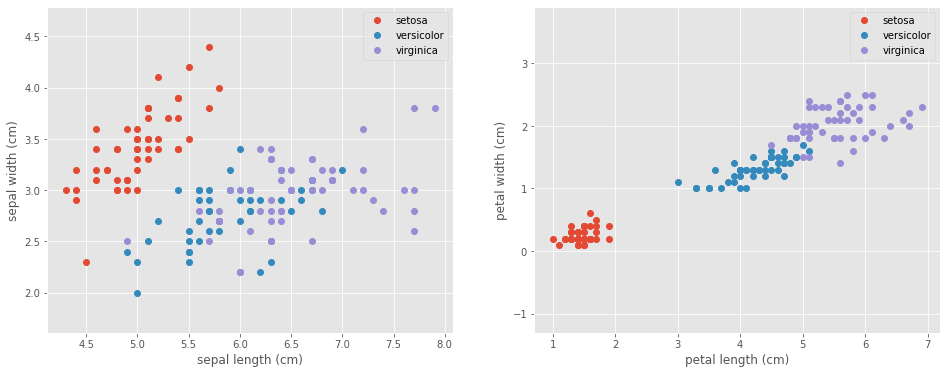

In [3]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [4]:
model = Sequential([Dense(8, input_dim=n_features, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(n_classes, activation='softmax')],
                    name='ANN')
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
model.summary();

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [5]:
logdir='log'+datetime.now().strftime("%y%m%d-%H%M%S")
cb=TensorBoard(log_dir=logdir)
print('Model name:', model.name)
history_callback = model.fit(X_train, y_train,
                                 batch_size=8,
                                 epochs=200,
                                 verbose=0,
                                 validation_data=(X_test, y_test),
                                 callbacks=[cb])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
history_dict = {}    
history_dict[model.name] = [history_callback, model]


Model name: ANN
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Test loss: 0.04445026069879532
Test accuracy: 0.9666666388511658


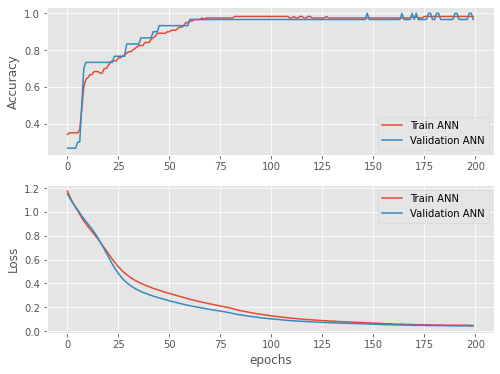

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    trn_acc = history_dict[model_name][0].history['accuracy']
    val_acc = history_dict[model_name][0].history['val_accuracy']
    trn_loss = history_dict[model_name][0].history['loss']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(trn_acc, label="Train "+ model_name)
    ax1.plot(val_acc, label="Validation "+model_name)
    ax2.plot(trn_loss, label="Train "+ model_name)
    ax2.plot(val_loss, label="Validation " + model_name)
    
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

In [ ]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 2].min() - .5, X_train[:,2].max() + .5
y_min, y_max = X_train[:, 3].min() - .5, X_train[:, 3].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),xx.ravel()*xx.ravel(), yy.ravel(),yy.ravel()*yy.ravel(), xx.ravel()*yy.ravel()])
